In [1]:
import pandas as pd

df = pd.read_csv("owid_climate_data.csv")
df = df.dropna(subset=["co2", "temperature"])
df.head()


,country,year,co2,temperature
0,Australia,1990,2.44,0.36
1,Australia,1991,0.46,0.42
2,Australia,1992,0.63,0.49
3,Australia,1993,0.26,0.41
4,Australia,1994,2.13,0.50


In [2]:
# Unique countries
unique_countries = set(df['country'])
print(len(unique_countries))  # Should be 10

# Filter function
def get_country_data(df, country, start_year, end_year):
    return df[(df['country'] == country) & (df['year'] >= start_year) & (df['year'] <= end_year)]

result = get_country_data(df, "India", 2000, 2020)
print(result.head())

10
    country  year   co2  temperature
112   India  2000  1.73         0.58
113   India  2001  1.97         0.68
114   India  2002  2.10         0.66
115   India  2003  2.19         0.61
116   India  2004  2.13         0.61


In [3]:
filtered = df[(df['year'] == 2020) & (df['co2'] > 10)]
print(filtered[['country', 'co2', 'temperature']])

   country    co2  temperature
98   China  11.16          0.9


In [4]:
yearly_stats = df.groupby('year')['temperature'].agg(['mean', 'min', 'max'])
print(yearly_stats.tail())

over_1_5 = df[df['temperature'] > 1.5]
prob = len(over_1_5) / len(df)
print("Probability of temperature > 1.5°C:", round(prob * 100, 2), "%")

       mean   min   max
year                   
2019  0.972  0.89  1.04
2020  0.997  0.90  1.10
2021  1.027  0.93  1.10
2022  0.998  0.94  1.06
2023  1.063  0.96  1.16
Probability of temperature > 1.5°C: 0.0 %


In [5]:
unique_combinations = df.groupby(['country', 'year']).size()
print("Total combinations:", len(unique_combinations))


Total combinations: 340


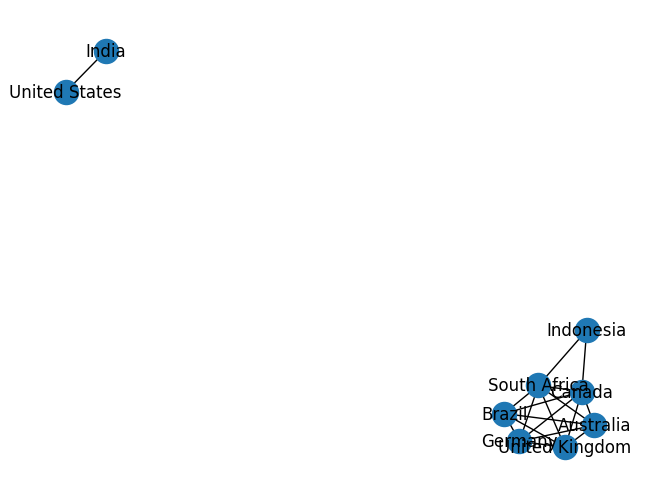

In [6]:
import networkx as nx

G = nx.Graph()
df_2020 = df[df['year'] == 2020]

for i, row1 in df_2020.iterrows():
    for j, row2 in df_2020.iterrows():
        if row1['country'] != row2['country']:
            if abs(row1['co2'] - row2['co2']) < 1.0:
                G.add_edge(row1['country'], row2['country'])

nx.draw(G, with_labels=True)

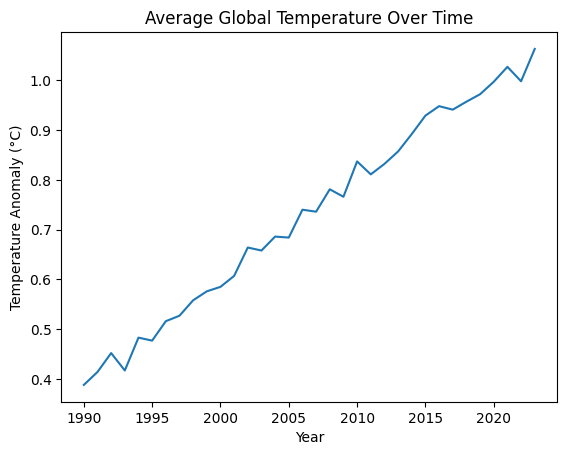

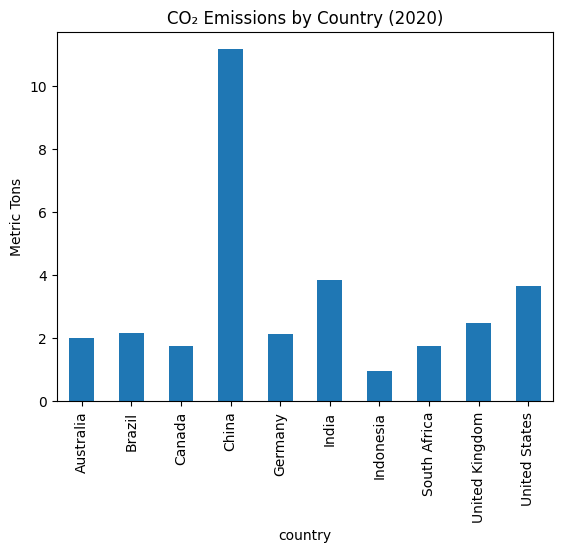

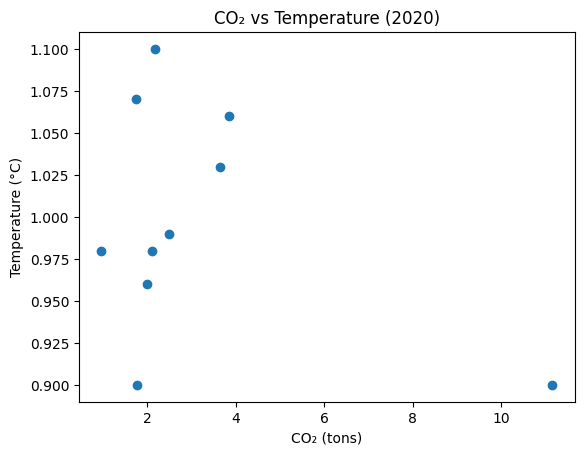

In [7]:
import matplotlib.pyplot as plt

# Line plot of average temp over time
df.groupby('year')['temperature'].mean().plot()
plt.title("Average Global Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

# Bar chart for 2020 CO2
df_2020 = df[df['year'] == 2020]
df_2020.groupby('country')['co2'].sum().plot(kind='bar')
plt.title("CO₂ Emissions by Country (2020)")
plt.ylabel("Metric Tons")
plt.show()

# Scatterplot
plt.scatter(df_2020['co2'], df_2020['temperature'])
plt.title("CO₂ vs Temperature (2020)")
plt.xlabel("CO₂ (tons)")
plt.ylabel("Temperature (°C)")
plt.show()